Being quite a lazy person, my natural inclination is to just bottleneck one of the standard CNNs and then train a small fully connected NN model... so we'll do that first.... probably deals with overfitting a bit better too...

Then we'll try fine tuning the same model.

Finally we'll build a basic CNN from scratch...

And finally finally we'll try one of Hinton's shiny new Capsule networks just for shits and giggles.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist
import numpy as np
from PIL import Image, ImageOps, ImageChops
import cv2
import os
import pickle
import itertools

#Inline Matplot graphics into the notebook
%matplotlib inline 


# From: https://gist.github.com/fabeat/6621507
# Using the version in the comments to the Gist
# Best practice default is using Bicubic rather than Antialias per http://pillow.readthedocs.io/en/3.0.x/releasenotes/2.7.0.html#default-filter-for-thumbnails
def scale(image, max_size=(128,128), method=Image.BICUBIC):
    """
    resize 'image' to 'max_size' keeping the aspect ratio
    and place it in center of white 'max_size' image
    """
    image.thumbnail(max_size, method)
    offset = (int((max_size[0] - image.size[0]) // 2), int((max_size[1] - image.size[1]) // 2))
    back = Image.new("RGB", max_size, "white")
    back.paste(image, offset)

    return back






In [ ]:
import shutil

shutil.rmtree('../gear_images_augmented')

import Augmentor
p = Augmentor.Pipeline("../gear_images",output_directory="../gear_images_augmented")
p.random_distortion(probability=.3, grid_width=4, grid_height=4, magnitude=8)
p.rotate(probability=.8, max_left_rotation=10, max_right_rotation=10)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.1, percentage_area=0.8)
p.flip_top_bottom(probability=0.5)
p.crop_random(probability=0.1, percentage_area=0.3)
p.sample(10000)

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image as kimage
from keras.applications.resnet50 import preprocess_input, decode_predictions

resnet50_model = ResNet50(weights='imagenet', include_top=False)


Using TensorFlow backend.


In [8]:
gear_images_dir = "../gear_images"
data = list()
hddata = list()
labels = list()
images = list()
features = list()
for directory in os.listdir(gear_images_dir):
    current_dir = gear_images_dir + '/' + directory
    print('Loading images from: {}'.format(current_dir))
    for imgName in os.listdir(os.fsencode(current_dir)):
        print('Loading: {}'.format(os.fsdecode(imgName)))
        image = Image.open(current_dir + '/' + os.fsdecode(imgName)) #Open as greyscale
        image = ImageOps.equalize(scale(image))
        images.append(image)
        data.append(np.asarray(image.convert('L')).flatten())
        labels.append(directory)
        
        #Featurize via ResNet50
        img = kimage.load_img(current_dir + '/' + os.fsdecode(imgName), target_size=(224, 224))
        x = kimage.img_to_array(img)
        hddata.append(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        #features.append(resnet50_model.predict(x))
        features.append(1)
        
    print('Done')   

Loading images from: ../gear_images/helmets
Loading: 10093454x1013457_zm.jpeg
Loading: 10188394x1011898_zm.jpeg
Loading: 2039658_408_main.jpg
Loading: 10308590x1010868_zm.jpeg
Loading: 10187948x1046104_zm.jpeg
Loading: 10308590x1010913_zm.jpeg
Loading: 110031.jpeg
Loading: PMMPIHOEHODFMANJx1038115_zm.jpeg
Loading: 2039617_004_main.jpg
Loading: 10337586x1012549_zm.jpeg
Loading: 10373906x1037650_zm.jpeg
Loading: 10225848x1010938_zm.jpeg
Loading: 10311144x1013039_zm.jpeg
Loading: 10187948x1011898_zm.jpeg
Loading: 10308340x1011898_zm.jpeg
Loading: 10274402x1010868_zm.jpeg
Loading: PMMPIHOEHODFMANJx1078795_zm.jpeg
Loading: PMMPIHOEHODFMANJx1121032_zm.jpeg
Loading: 10311543x1010868_zm.jpeg
Loading: 10308340x1027215_zm.jpeg
Loading: 10311543x1012549_zm.jpeg
Loading: 899118.jpeg
Loading: 850336.jpeg
Loading: 10239792x1052090_zm.jpeg
Loading: 114688.png
Loading: 899119.jpeg
Loading: 10373906x1012549_zm.jpeg
Loading: 1313675_801_main.png
Loading: 10187949x1040578_zm.jpeg
Loading: 10311543x101303

Loading: 10254529x1114306_zm.jpeg
Loading: 10342602x1086248_zm.jpeg
Loading: 10316925x1050984_zm.jpeg
Loading: 10342602x1069414_zm.jpeg
Loading: 10252805x1044494_zm.jpeg
Loading: 10312819x1149856_zm.jpeg
Loading: 10312601x1083401_zm.jpeg
Loading: 10344853x1057721_zm.jpeg
Loading: 10342603x1149124_zm.jpeg
Loading: 10167913x1116023_zm.jpeg
Loading: 102814.jpeg
Loading: 10344610x1042281_zm.jpeg
Loading: 10281299x1043346_zm.jpeg
Loading: 10312601x1149696_zm.jpeg
Loading: 10281293x1140556_zm.jpeg
Loading: 10312822x1149778_zm.jpeg
Loading: 10342607x1012360_zm.jpeg
Loading: 10342601x1012905_zm.jpeg
Loading: 10282885x1128622_zm.jpeg
Loading: 10281293x1012905_zm.jpeg
Loading: 10281834x1090156_zm.jpeg
Loading: 10251218x1012905_zm.jpeg
Loading: 10281294x1149111_zm.jpeg
Loading: 2041239_001_main.jpg
Loading: 10314736x1012379_zm.jpeg
Loading: 10342601x1140544_zm.jpeg
Loading: 10317138x1050984_zm.jpeg
Loading: 10305668x1059019_zm.jpeg
Loading: 10305668x1036951_zm.jpeg
Loading: 10316925x1010985_zm.jp

Loading: 515fntyUdWL._AC_US320_QL65_.jpg
Loading: 2448830621_185889_png_overview_4.png
Loading: 10374265x1012905_zm.jpeg
Loading: 2432410589_197182_png_overview_6.png
Loading: 10166085x1013852_zm.jpeg
Loading: 870649.jpeg
Loading: 51OOXLzIgGL._AC_US320_QL65_.jpg
Loading: 10282924x1012905_zm.jpeg
Loading: 10313338x1012905_zm.jpeg
Loading: 10254281x1012905_zm.jpeg
Loading: 2448820001_145392_png_overview_7.png
Loading: 51W0gAnTkkL._AC_US320_QL65_.jpg
Loading: 2539511159_197212_png_overview_2.png
Loading: 2432670001_145325_png_overview_7.png
Loading: 10230876x1083082_zm.jpeg
Loading: 10374257x1012905_zm.jpeg
Done
Loading images from: ../gear_images/harnesses
Loading: 10308569x1010913_zm.jpeg
Loading: 10311125x1012549_zm.jpeg
Loading: 2036234_501_main.jpg
Loading: 10337844x1107641_zm.jpeg
Loading: 2036232_408_main.jpg
Loading: 10337527_zm.jpeg
Loading: 515mXlL31xL._AC_US436_QL65_.jpg
Loading: 10373870_zm.jpeg
Loading: 10337865x1111105_zm.jpeg
Loading: 51yrA4d+N0L._AC_US436_QL65_.jpg
Loading

Loading: 2027610_408_main.jpg
Loading: 10291011x1021466_zm.jpeg
Loading: 10290361x1106578_zm.jpeg
Loading: 2023331_101_main.jpg
Loading: 10373854_zm.jpeg
Loading: 10290360x1013039_zm.jpeg
Loading: 10290992x1005685_zm.jpeg
Loading: 10291108x1010913_zm.jpeg
Loading: 882029.jpeg
Loading: 10373950x1012549_zm.jpeg
Loading: 2027612_501_main.jpg
Loading: 10277185x1012549_zm.jpeg
Loading: 10275597x1043665_zm.jpeg
Loading: 10337628x1145760_zm.jpeg
Loading: 897868.jpeg
Loading: 10290358x1012549_zm.jpeg
Loading: 10290363x1036944_zm.jpeg
Loading: 10277186x1106723_zm.jpeg
Loading: 10275596x1090012_zm.jpeg
Loading: 10275599x1105812_zm.jpeg
Loading: 10290361x1037072_zm.jpeg
Loading: 10374042_zm.jpeg
Loading: 10253749x1003070_zm.jpeg
Loading: 10290362x1106580_zm.jpeg
Loading: 869754.jpeg
Loading: 10337877x1037016_zm.jpeg
Loading: 10373885_zm.jpeg
Loading: 897869.jpeg
Loading: 10215515x1012549_zm.jpeg
Loading: 114546.jpeg
Loading: 10373911x1013041_zm.jpeg
Loading: 10277185x1037399_zm.jpeg
Loading: 2027

Loading: 10311149_zm.jpeg
Loading: 100202.jpeg
Loading: 10094150x1012163_zm.jpeg
Loading: 851352.jpeg
Loading: 10187938x1024698_zm.jpeg
Loading: 10215227_zm.jpeg
Loading: 2022020_001_main.jpg
Loading: 10311166_zm.jpeg
Loading: 10285552x1024698_zm.jpeg
Loading: 41KrrjlrahL._AC_US436_QL65_.jpg
Loading: 10215217x1049398_zm.jpeg
Loading: 10215252_zm.jpeg
Loading: 51ZH5pFe-AL._AC_US436_QL65_.jpg
Loading: 10285551x1024698_zm.jpeg
Loading: 10285553x1024698_zm.jpeg
Loading: 10260950x1012163_zm.jpeg
Loading: 10311159_zm.jpeg
Loading: 2022025_701_main.jpg
Loading: 41L3nwPccfL._AC_US436_QL65_.jpg
Loading: 41PzmOo-E7L._AC_US436_QL65_.jpg
Loading: 798354.jpeg
Loading: 412N335RtzL._AC_US436_QL65_.jpg
Loading: 100503.jpeg
Loading: 10101041x1049516_zm.jpeg
Loading: 10260952x1011898_zm.jpeg
Loading: 10215231x1075126_zm.jpeg
Loading: 41wYHIh1NdL._AC_US436_QL65_.jpg
Loading: 10285550x1024698_zm.jpeg
Loading: 10321060_zm.jpeg
Loading: 1312845_000_main.jpg
Loading: 10373997_zm.jpeg
Loading: 897732.jpeg
Loa

Loading: 117562.jpeg
Loading: 10093798x1010913_zm.jpeg
Loading: 41xNUFSsZXL._AC_US436_QL65_.jpg
Loading: 10317015x1131931_zm.jpeg
Loading: 2030142_004_main.jpg
Loading: 10331168x1010913_zm.jpeg
Loading: 2030147_707_main.jpg
Loading: 10333522_zm.jpeg
Loading: 2036244_004_main.jpg
Loading: 31LVIQfX1LL._AC_US436_QL65_.jpg
Loading: 311cfqzAQnL._AC_US436_QL65_.jpg
Loading: 10196841x1040008_zm.jpeg
Loading: 2023997_805_main.jpg
Loading: 2022271_308_main.jpg
Loading: 10236017x1063631_zm.jpeg
Loading: 10368522_zm.jpeg
Loading: 10272413x1043671_zm.jpeg
Loading: 10334708x1011898_zm.jpeg
Loading: 10304414x1010913_zm.jpeg
Loading: 2022274_308_main.jpg
Loading: 10192296x1011209_zm.jpeg
Loading: 880481.jpeg
Loading: 2045435_707_main.jpg
Loading: 10271723x1095375_zm.jpeg
Loading: 2022272_308_main.jpg
Loading: 10271724x1014212_zm.jpeg
Loading: 10334655x1011898_zm.jpeg
Loading: 2030174_003_main.jpg
Loading: 10331169x1010913_zm.jpeg
Loading: 894456.jpeg
Loading: 10316945x1071766_zm.jpeg
Loading: 2030140

Loading: 10280281x1107714_zm.jpeg
Loading: 10273549_zm.jpeg
Loading: 10094191x1013039_zm.jpeg
Loading: 10364090x1024698_zm.jpeg
Loading: 51kZO9Ph1fL._AC_US436_QL65_.jpg
Loading: 10337530x1011898_zm.jpeg
Loading: 41bDM-xYTAL._AC_US436_QL65_.jpg
Loading: 41je0d9yxwL._AC_US436_QL65_.jpg
Loading: 10290909x1012163_zm.jpeg
Loading: 10019161x1036971_zm.jpeg
Loading: 10312193x1014941_zm.jpeg
Loading: 10019210x1014941_zm.jpeg
Loading: 41fMhCIULrL._AC_US436_QL65_.jpg
Loading: 897759.jpeg
Loading: 2040659_001_main.jpg
Loading: 10290909x1012549_zm.jpeg
Loading: 10019209_zm.jpeg
Loading: 10301651_zm.jpeg
Loading: 210lKr6YFkL._AC_US218_.jpg
Loading: 10311129x1012163_zm.jpeg
Loading: 10260955x1012905_zm.jpeg
Loading: 10011087x1013367_zm.jpeg
Loading: 890264.jpeg
Loading: 10364094x1013041_zm.jpeg
Loading: 10094159x1024698_zm.jpeg
Loading: 899006.jpeg
Loading: 10118808x1012549_zm.jpeg
Loading: 10210811x1012905_zm.jpeg
Loading: 899071.jpeg
Loading: 41z2wKcvcKL._AC_US436_QL65_.jpg
Loading: 10308242x11250

Loading: 887388.jpeg
Loading: 10332548x1162504_zm.jpeg
Loading: 10245196x1152818_zm.jpeg
Loading: 10220010x1140544_zm.jpeg
Loading: 10226541x1012905_zm.jpeg
Loading: 10354021x1011059_zm.jpeg
Loading: 10333985x1040165_zm.jpeg
Loading: 10312590x1044494_zm.jpeg
Loading: 893230.jpeg
Loading: 10281311x1027657_zm.jpeg
Loading: 10214105x1048213_zm.jpeg
Loading: 10357292x1011831_zm.jpeg
Loading: 10245196x1010868_zm.jpeg
Loading: 10302867x1150402_zm.jpeg
Loading: 10330053x1011645_zm.jpeg
Loading: 10184925x1107866_zm.jpeg
Loading: 10313298x1037114_zm.jpeg
Loading: 10220099x1043346_zm.jpeg
Loading: 10251194x1108041_zm.jpeg
Loading: 10342598x1015986_zm.jpeg
Loading: 10237598x1012511_zm.jpeg
Loading: 10281158x1128790_zm.jpeg
Loading: 880692.jpeg
Loading: 10350143x1034282_zm.jpeg
Loading: 10281311x1012512_zm.jpeg
Loading: 10343683x1012905_zm.jpeg
Loading: 10185324x1013303_zm.jpeg
Loading: 10349909x1012905_zm.jpeg
Loading: 10330309x1149711_zm.jpeg
Loading: 10334353x1012905_zm.jpeg
Loading: 10350132x1

In [9]:
data_array = np.asarray(data)
print(data_array.shape)

hddata_array = np.asarray(hddata)
print(hddata_array.shape)

label_array = np.asarray(labels)
print(label_array.shape)

feature_array = np.asarray(np.squeeze(features))
print(feature_array.shape)

num_classes= len(list(set(labels)))
print(num_classes)

(2122, 16384)
(2122, 224, 224, 3)
(2122,)
(2122,)
12


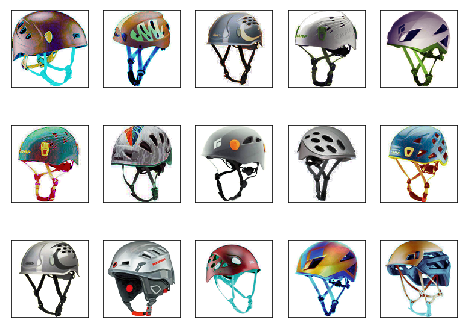

In [10]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i], cmap=plt.cm.bone)
    

In [11]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le.fit(label_array)
encoded_label_array = le.transform(label_array)

In [12]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_array,
        encoded_label_array, random_state=0)

X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(feature_array,
        encoded_label_array, random_state=0)

X_hd_train, X_hd_test, y_hd_train, y_hd_test = train_test_split(hddata_array,
        encoded_label_array, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(X_feat_train.shape, X_feat_test.shape)
print(y_feat_train.shape, y_feat_test.shape)
print(X_hd_train.shape, X_hd_test.shape)
print(y_hd_train.shape, y_hd_test.shape)

(1591, 16384) (531, 16384)
(1591,) (531,)
(1591,) (531,)
(1591,) (531,)
(1591, 224, 224, 3) (531, 224, 224, 3)
(1591,) (531,)


Train a simple fully connected model on the features we bottlenecked out. We can see how much of a problem that overfitting is. By playing with the hyper-parameters; e.g. try changing numberof units in the layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = None
model = Sequential()
model.add(Dense(64,input_dim=len(X_feat_train[1,:])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(X_feat_train, y_feat_train,
          epochs=50,
          batch_size=30,
          validation_data=(X_feat_test, y_feat_test))

Based on the Keras [applications sample](https://keras.io/applications/) but using ResNet and not inception

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = resnet50_model #As we already loaded the model above.

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- of size num_classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.summary()

# train the model on the new data for a few epochs
model.fit(X_hd_train, y_hd_train,
          epochs=20,
          batch_size=30,
          validation_data=(X_hd_test, y_hd_test))


Let's dump the layers out so that we can work out what we might unlock. Really good to refer to the [ResNet-50 model architechture](https://github.com/KaimingHe/deep-residual-networks#models)

In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

Let's unlock from the Residual 5a branches up. So everything above the 4f Relu activation which is everything > 142

In [ ]:
for layer in model.layers[:141]:
   layer.trainable = False
for layer in model.layers[142:]:
   layer.trainable = True

#Recompile and train low and slow.
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now fine tune for 20 epochs.... again... overfitting is the big issue here
model.fit(X_hd_train, y_hd_train,
          epochs=20,
          batch_size=30,
          validation_data=(X_hd_test, y_hd_test))

Train a new, simple CNN. Based on some cut and paste code but changed to use different kernel dimesions (because we have multi-channel data)

In [16]:
X_hd_train.shape

(1591, 224, 224, 3)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
import keras

input_shape = (224,224,3)

simple_model = Sequential()

simple_model.add(Conv2D(64, (3, 3),  input_shape=input_shape))
simple_model.add(Activation('relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_model.add(Conv2D(64, (3, 3)))
simple_model.add(Activation('relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_model.add(Conv2D(64, (3, 3)))
simple_model.add(Activation('relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_model.add(Conv2D(64, (3, 3)))
simple_model.add(Activation('relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_model.add(Flatten())

simple_model.add(Dense(220, activation='relu'))

simple_model.add(Dropout(0.5))
simple_model.add(Dense(num_classes, activation='softmax'))
simple_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])



simple_model.summary()


from keras import callbacks
tbCallback = callbacks.TensorBoard(log_dir='SimpleCNN_Graph', histogram_freq=2,  
          write_graph=True, write_images=True)
tbCallback.set_model(simple_model)

#Then we can view with: tensorboard  --logdir SimpleCNN_Graph/

simple_model.fit(X_hd_train, y_hd_train,
          epochs=20,
          batch_size=30,
          validation_data=(X_hd_test, y_hd_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_76 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_77 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 52, 52, 64)        36928     
__________

KeyboardInterrupt: 

Finally we'll play with a simple CapsNet architechture...